In [1]:
 import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
HouseDF = pd.read_csv('house price.csv')

In [4]:
#To see the head of the dataset
HouseDF.head()

,House Area,Price
0,2500,1000000
1,3000,1200000
2,1500,650000
3,2000,800000
4,1200,500000


In [5]:
#Getting info of the dataset
HouseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   House Area  14 non-null     int64
 1   Price       14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [6]:
#To describe the dataframe(get deviations)
HouseDF.describe()

,House Area,Price
count,14.000000,1.400000e+01
mean,10335.714286,4.094286e+06
std,20929.647986,8.365437e+06
min,400.000000,1.500000e+05
25%,1050.000000,4.400000e+05
50%,1900.000000,7.500000e+05
75%,3750.000000,1.425000e+06
max,75000.000000,3.000000e+07


In [7]:
#To get the columns of the dataframe
HouseDF.columns

Index(['House Area', 'Price'], dtype='object')

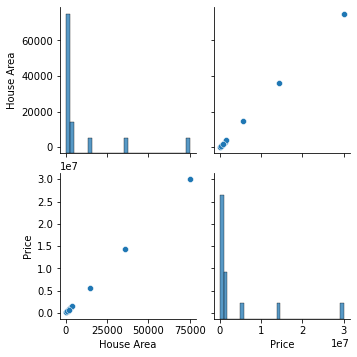

In [8]:
#Getting plots of the various parameters of the dataset
sns.pairplot(HouseDF)

<AxesSubplot:>

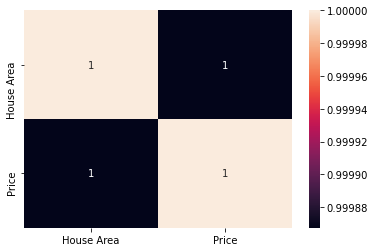

In [9]:
#To get the correlation of the data frame(Heat Map)
#corr=>correlation
#annot=>annotation
sns.heatmap(HouseDF.corr(), annot=True)

In [10]:
#Initializing the independent variables
X = HouseDF[['House Area']]
y = HouseDF['Price']

In [11]:
#Creating training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Creating Train set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
#Putting the train set in Linear Regression model
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [18]:
coeff_df

,Coefficient
House Area,399.915737


In [19]:
#Predicting using test dataset
predictions = lm.predict(X_test)

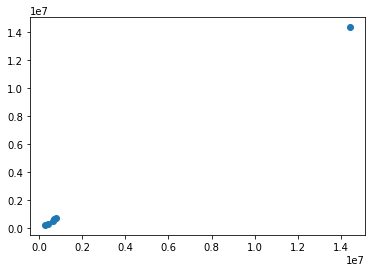

In [20]:
#Plotting the predictions against y_test
plt.scatter(y_test,predictions)

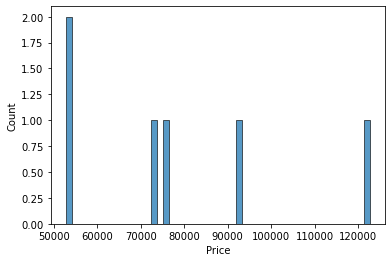

In [21]:
sns.histplot((y_test-predictions),bins=50);

In [22]:
#Bellshaped histogram reveals that the models are well predicted.

In [23]:
# define input
new_input = [[36000]]
new_output = lm.predict(new_input)
print("Given Area is ",new_input)
print("Predicted price is ",new_output)
accuracy = lm.score(X_test, y_test)
print('Accuracy : ',accuracy*100,'%')

Given Area is  [[36000]]
Predicted price is  [14324286.6793097]
Accuracy :  99.97472917790095 %


In [26]:
# Array of predicted results 
predictions

array([  247252.72601779,   527193.74213439,   727151.61078911,
         647168.46332722, 14324286.6793097 ,   327235.87347968])

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 78285.15082368546
MSE: 6716566843.394702
RMSE: 81954.66334135417
